In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

Text(2.3, 9.2, 'Palbociclib(IC50: 0.66)\ndose: 10')

(0.3, 4.2)

(0.3, 4.3)

Text(0.02, 1, '(a)')

C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.27, -0.02, 'TCP score: 8.1, FDR: 6.9e-11')

Text(0.77, -0.02, 'TCP score: -7.8, FDR: 5.8e-10')

Text(0.02, 0.52, '(b)')

C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


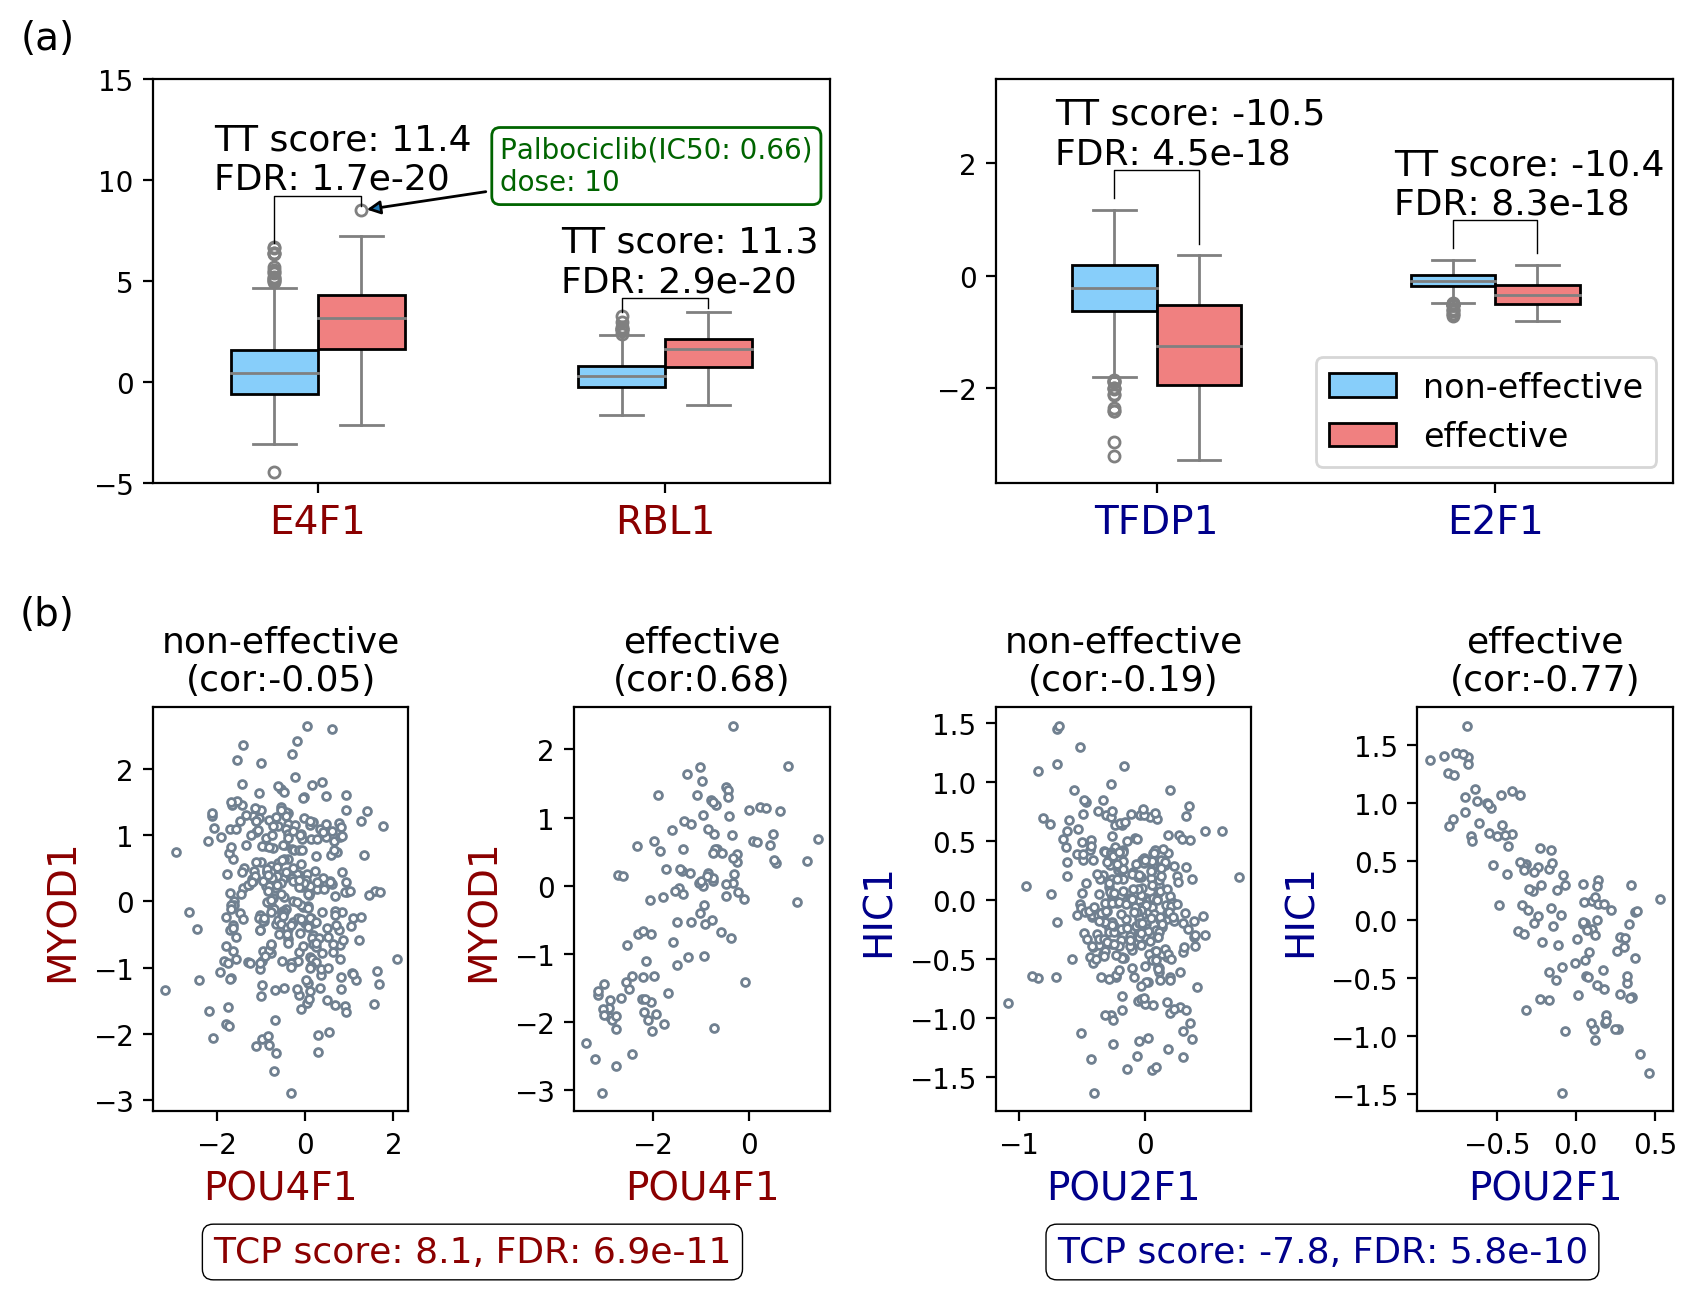

In [18]:
def TFA_boxplot(cell, TF1, TF2, ax, yMar, ylim):
    TTS_df=pd.read_table('result/TTscore/TTS_{}.txt'.format(cell), sep='\t',index_col=0)
    TTS_df=TTS_df.loc[[TF1,TF2],['TTS','FDR']]
    
    TFA_df=pd.read_table('result/TF_activity/effect/TFA_Effect_{}_all.txt'.format(cell), sep='\t')
    TFA_df=TFA_df[[TF1,TF2,'effect']]
    TFA_df['effect'] = TFA_df['effect'].astype(int)
    
    neg_TFA_df=TFA_df.loc[TFA_df['effect']==0]
    pos_TFA_df=TFA_df.loc[TFA_df['effect']==1]
    
    flierprops = dict(marker='o', markersize=4,markerfacecolor='none',markeredgecolor='grey')
    
    bp1=ax.boxplot([neg_TFA_df[TF1], neg_TFA_df[TF2]], positions=[1,3], widths=0.5 ,patch_artist=True,
                   boxprops={'facecolor':'lightskyblue'}, flierprops=flierprops, whiskerprops=dict(color='grey'), medianprops=dict(color='grey'), capprops=dict(color='grey'))
    bp2=ax.boxplot([pos_TFA_df[TF1], pos_TFA_df[TF2]], positions=[1.5,3.5], widths=0.5, patch_artist=True,
                   boxprops={'facecolor':'lightcoral'}, flierprops=flierprops, whiskerprops=dict(color='grey'), medianprops=dict(color='grey'), capprops=dict(color='grey'))

    ax.set_xticks([1.25,3.25])
    ax.set_xticklabels([TF1,TF2], fontsize=14)

    
    # display TTS,FDR
    xMar=0.2
    for x,TF in zip(ax.get_xticks(), [TF1, TF2]):
        neg_max=np.max(TFA_df.loc[TFA_df['effect']==0,TF])+0.2
        pos_max=np.max(TFA_df.loc[TFA_df['effect']==1,TF])+0.2
        all_max=np.max([neg_max, pos_max])+yMar
        
        ax.plot([x-0.25, x-0.25, x+0.25, x+0.25], [neg_max, all_max, all_max, pos_max], lw=0.5, c='k')
        
        text1='TT score: {:.1f}'.format(TTS_df.loc[TF,'TTS'])+'\n'+'FDR: {:.1e}'.format(TTS_df.loc[TF,'FDR'])
        ax.text(x-0.6, all_max, text1, ha='left', va='bottom', color='k', fontsize=13)
           
    ax.set_ylim(ylim)
    
    return bp1, bp2

def get_top_TTP(cell):
    corr_df=pd.read_table('result/TCPscore/TCPS_{}.txt'.format(cell), sep='\t',index_col=0,engine='python')
    corr_df.set_index(['g1','g2'], inplace=True)
    corr_df.sort_values(by='Zobs(TCPS)',ascending=False, inplace=True)
    pos_TCP=corr_df.iloc[0]
    neg_TCP=corr_df.iloc[-1]

    return ((pos_TCP.name, pos_TCP['corrE'], pos_TCP['corrNE'], pos_TCP['Zobs(TCPS)'], pos_TCP['FDR']),
            (neg_TCP.name, neg_TCP['corrE'], neg_TCP['corrNE'], neg_TCP['Zobs(TCPS)'], neg_TCP['FDR']))

def draw_scatter_plot(TFA_df, TP1, TP2, corr, effect, label_color, ax):
    x=TFA_df.loc[TFA_df['effect']==effect,TP1]
    y=TFA_df.loc[TFA_df['effect']==effect,TP2]
    ax.scatter(x,y, edgecolor='slategray', c='white',s=8)
    if effect==0:
        ax.set_title('non-effective\n(cor:{:.2f})'.format(corr), fontsize=13)
    if effect==1:
        ax.set_title('effective\n(cor:{:.2f})'.format(corr), fontsize=13)
    
    ax.set_xlabel(TP1, color=label_color, fontsize=14)
    ax.set_ylabel(TP2, color=label_color, fontsize=14)
    
    
fig = plt.figure(figsize=(8.5,6), dpi=200)
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,4), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,4), (1,0), fig=fig)
ax4 = plt.subplot2grid((2,4), (1,1), fig=fig)
ax5 = plt.subplot2grid((2,4), (1,2), fig=fig)
ax6 = plt.subplot2grid((2,4), (1,3), fig=fig)

##### TT plots
## top positive TT
bp1,bp2=TFA_boxplot('A375', 'E4F1', 'RBL1', ax1, 0.5, (-5.0,15))
ax1.tick_params(axis='x', labelcolor='darkred')
# add drug_info
drug_info='Palbociclib(IC50: 0.66)\ndose: 10'
ax1.annotate(drug_info, xy=(1.5, 8.5), xytext=(2.3, 9.2), ha='left', va='bottom', arrowprops={'arrowstyle': '-|>'}, fontsize=10,
            color='darkgreen',bbox=dict(facecolor='none', edgecolor='darkgreen', boxstyle='round'))

ax1.set_xlim(0.3, 4.2)
# add drug_info End


## top negative TT
bp1,bp2=TFA_boxplot('A375', 'TFDP1', 'E2F1', ax2, 0.5, (-3.7,3.5))
ax2.tick_params(axis='x', labelcolor='darkblue')

## legend only in ax2
ax2.legend(handles=(bp1["boxes"][0],bp2["boxes"][0]), labels=['non-effective', 'effective'], loc='lower right', fontsize=12)
ax2.set_xlim(0.3, 4.3)

#fig.suptitle('Normalized TFA')
#fig.text(0.5,1,'Normalized TFA', ha='center', va='center', fontsize=15)
fig.text(0.02,1,'(a)', ha='center', va='center', fontsize=14)
fig.show()


##### TCP plots
cell='A375'
(pos_TCP, pos_effect_corr, pos_nonEffect_corr, pos_TCPS, pos_TCP_FDR), (neg_TCP, neg_effect_corr, neg_nonEffect_corr, neg_TCPS, neg_TCP_FDR) =get_top_TTP(cell)

## ax2,3,4,5
TFA_df=pd.read_table('result/TF_activity/effect/TFA_Effect_{}_all.txt'.format(cell), sep='\t',engine='python')

draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_nonEffect_corr, 0, 'darkred', ax3)
draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_effect_corr   , 1, 'darkred', ax4)
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_nonEffect_corr, 0, 'darkblue', ax5)
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_effect_corr   , 1, 'darkblue', ax6)

### add text for TCP score and FDR
fig.text(0.27,-0.02, 'TCP score: {:.1f}, FDR: {:.1e}'.format(pos_TCPS,pos_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkred',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
fig.text(0.77,-0.02, 'TCP score: {:.1f}, FDR: {:.1e}'.format(neg_TCPS,neg_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkblue',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

#fig.text(0.5,0.52,'Normalized TFA', ha='center', va='center', fontsize=15)
fig.text(0.02,0.52,'(b)', ha='center', va='center', fontsize=14)
fig.tight_layout(h_pad=3)
fig.show()